<a href="https://colab.research.google.com/github/camihshm/Analysis-Market-Americanas/blob/feat-1%2FUploadProject/Notebook%20-%20API%20%2B%20Graph%20%2B%20API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJETO - API + RELATÓRIO INFOGRÁFICO PDF**

***Descrição***

Buscar os dados financeiros da ação da empresa AMERICANAS utilizando a API (YFINANCE), para criar análises dos dados com gráficos utilizando o framework (PLOTLY), customizar o layout do relatório no formato PDF (MAKE_SUBPLOT do próprio framework PLOTLY) e criar o envio automático desse relatório.

In [1]:
# Instalação dos pacotes
# Mercado Financeiro - B3

!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Instalação das bibliotecas necessárias para o projeto

# YFinance
import yfinance as yf
yf.pdr_override()

# Pacotes para análise dos dados
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Pacotes análises gráficas
import matplotlib.pyplot as plt
import seaborn as sbn
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Biblioteca para datas
from datetime import datetime

# Avisos
import warnings
warnings.filterwarnings('ignore')

# **API Yahoo Finance**

O yfinance oferece uma maneira segmentada e pythonic de baixar dados do mercado financeiro através do Yahoo!Ⓡ Finanças.

In [3]:
# Para obter os dados
dados = web.get_data_yahoo_actions( 'AMER3.SA', period='1y')

# Shape
dados.shape

[*********************100%***********************]  1 of 1 completed


(250, 6)

In [4]:
# Verificando as movimentações da ação
dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-23,30.150000,32.240002,29.530001,29.690001,29.690001,12396200
2022-02-24,28.110001,30.610001,27.510000,30.200001,30.200001,7522700
2022-02-25,30.420000,30.570000,29.000000,30.500000,30.500000,11618900
2022-03-02,30.500000,32.750000,30.100000,32.450001,32.450001,5595700
2022-03-03,32.450001,32.860001,31.049999,31.100000,31.100000,6343400


In [5]:
# Para carregar os últimos registros
dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-15,1.12,1.19,1.07,1.13,1.13,34754000
2023-02-16,1.19,1.27,1.16,1.22,1.22,96407900
2023-02-17,1.21,1.23,1.15,1.17,1.17,21804500
2023-02-22,1.16,1.17,1.10,1.11,1.11,16742100
2023-02-23,1.12,1.17,1.10,1.11,1.11,21093000


# Estatística Descritiva

Estatística é o conjunto de técnicas que possibilita, de forma sistemática: a organização, descrição, análise e interpretação de dados oriundos de estudos/experimentos.

Logo, estatística descritiva é a etapa inicial da análise de dados e tem como seu principal objetivo descrever os dados observados.


In [6]:
# Estatística Descritiva
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,16.087160,16.631560,15.509000,15.999760,15.999760,3.354347e+07
std,8.224887,8.427637,7.991743,8.192631,8.192631,4.633268e+07
min,0.800000,0.870000,0.640000,0.710000,0.710000,3.248200e+06
25%,10.992500,11.312500,10.400000,10.977500,10.977500,9.468375e+06
50%,15.625000,16.240001,15.200000,15.555000,15.555000,1.953690e+07
75%,21.230000,22.090001,20.669999,21.347500,21.347500,3.322265e+07
max,34.660000,35.250000,33.830002,34.650002,34.650002,2.926335e+08


In [7]:
# Carregar as informações referente ao dataframe criado
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-02-23 to 2023-02-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


# MÉDIA MÓVEL

A média móvel é um indicador que faz parte da análise técnica das ações, com ela é possível identificar o equilíbrio dos preços no mercado, observando as tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para o cálculo.

- Como fazer esse cálculo?
Utilizar a fórmula: MMA = soma dos preços de fechamento/número de dias.



In [8]:
from statistics import mean as media

# Media simples
list = [11, 12, 13, 14, 15, 16, 17]
print(f'Media: { media(list) }')
print(f'Media: { (11+12+13+14+15+16+17) / len(list)} ')

Media: 14
Media: 14.0 


In [9]:
# Período de média móvel

n = 5

for intervalo in range(3):
  print(f'{intervalo}ª Dia: { sum(list[intervalo:n]) / 5}')

0ª Dia: 13.0
1ª Dia: 10.8
2ª Dia: 8.4


Text(0.5, 1.0, 'Preço Fechamento')

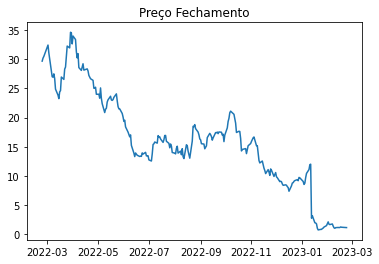

In [10]:
# Plot
plt.plot(dados['Close'])
plt.title('Preço Fechamento')

# Função Rolling

A função rolling() é uma função do pandas que permite calcular estatísticas em janelas deslizantes de dados.
Ela é muito útil para calcular médias móveis, desvios padrão, somatórios, mínimos e máximos, entre outras estatísticas.


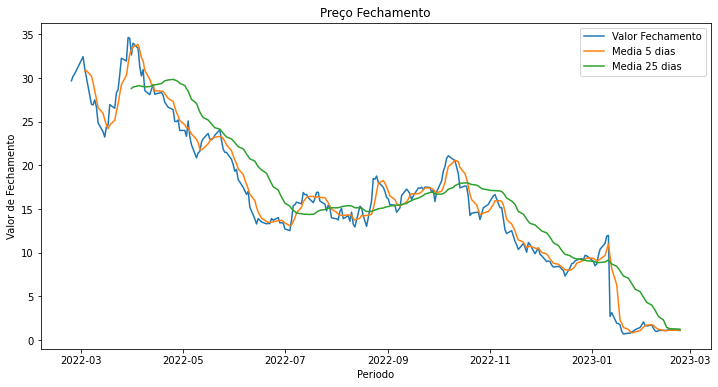

In [11]:
from pandas.core import window

periodo = 5
dados['Close'].rolling( window=periodo ).mean()

# Tamanho da imagem
plt.figure( figsize=(12, 6) )

plt.plot( dados['Close'] )
plt.plot( dados['Close'].rolling( window=periodo ).mean() )
plt.plot( dados['Close'].rolling( window=periodo + 20 ).mean() )
plt.title('Preço Fechamento')
plt.legend(['Valor Fechamento', 'Media 5 dias', 'Media 25 dias'])
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo');

# Library Ploty

É uma biblioteca de plotagem interativa e de código aberto, oferece suporte +40 tipos de gráficos exclusivos e abrange uma variedade de casos de uso, como: estatística, finanças, geografia, científica e tri-dimensionais.

Utilizar:
ploty.express(px) -> uma forma rápida de criar visualizações dinâmica de dados.
ploty.graph_objects(go) -> é a forma de utilizar a API que oferece maior controle sobre as suas visualizações, porém mais intensiva no código.



In [12]:
periodo = 5

dados['Media Movel'] = dados['Close'].rolling(window=periodo).mean()
Figure = px.line(
    dados,
    y='Close',
    title='Fechamento'
)

Figure.show()

In [13]:
Figure_02 = go.Figure(
    data=go.Scatter(
        x=dados.index,
        y=dados['Close'],
        line=(dict(color='firebrick', width=3))
    )
)

Figure_02.update_layout(
    title='Análise de Fechamento',
    xaxis_title='Período',
    yaxis_title='Preço de Fechamento'
)

Figure_02.show()

# Candlestick Charts

É um modelo de gráfico que demonstra a abertura, a alta, a baixa e o fechamento para uma x coordenada (provavelmente, o tempo). As caixas representam a dispersão entre os valores do OPEN e CLOSE, as linhas representam a dispersão entre os valores LOW e HIGH. Os pontos de amostragem onde o valor de fechamento é maior (inferior) do que o valor de abertura, chamados de crescentes (descrecentes). Por padrão, as velas crescentes são desenhadas em verde, enquanto as descrecentes são desenhadas em vermelho

In [14]:
Grafico_Candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=dados.index,
            open=dados['Open'],
            high=dados['High'],
            low=dados['Low'],
            close=dados['Close'],
            increasing_line_color='green',
            decreasing_line_color='red'
        )
    ]
)


Grafico_Candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)


Grafico_Candlestick.show()

# Customizando o Relatório



In [19]:
# Criar a Figura
Figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação', 'Fechamento')
)

# Layout e Dimensão
Figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Análise de Mercado</b> <br>Americanas SA.'
)

# Adicionado um gráfico na 1º Posição
Figura.add_trace(
    go.Candlestick(
        x=dados.index,
        open=dados['Open'],
        high=dados['High'],
        low=dados['Low'],
        close=dados['Close'],
        increasing_line_color='red',
        decreasing_line_color='green'
    ),
    row=1, col=1
)

Figura.add_trace(
    go.Scatter(
        x=dados.index,
        y=dados['Media Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='yellow')
    ),
    row=1, col=1
)

Figura.update_layout(
    xaxis_rangeslider_visible=False
)

# Adicionado um gráfico na 2º Posição
Figura.add_trace(
    go.Scatter(
        x=dados.index,
        y=dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

Figura.add_trace(
    go.Scatter(
        x=dados.index,
        y=dados['Media Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='red')
    ),
    row=2, col=1
)

Figura.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=10) 
    )
)

Figura.add_annotation(
    showarrow=False,
    text='Análise feita utilizando o Python',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura.add_annotation(
    showarrow=False,
    text='BY: @camihshm - Camila da Silva Monteiro',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Figura.show()

# Exportando Relatório em PDF

**Kaleido**

Kaleido é uma biblioteca de plataforma cruzada para geração de imagens estáticas (por exemplo, png, svg, pdf, etc.) para bibliotecas de visualização baseadas na web, com foco particular na eliminação de dependências externas. O foco inicial do projeto é a exportação de imagens plotly.js do Python para uso por plotly.py, mas ele foi projetado para ser relativamente direto para estender a outras bibliotecas de visualização baseadas na web e outras linguagens de programação. O foco principal do Kaleido (pelo menos inicialmente) é servir como uma dependência de bibliotecas de visualização baseadas na web, como plotly.py. Como tal, o foco está em fornecer uma API programática, em vez de amigável ao usuário.

In [16]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
Figura.write_image('Relatório Financeiro Americanas.pdf')